# Titanic - Machine Learning from Disaster

##### The objective of this competition is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### Import of packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

!pip install -U seaborn

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
     |████████████████████████████████| 285 kB 623 kB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

hypertools 0.6.2 requires scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.23.2 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


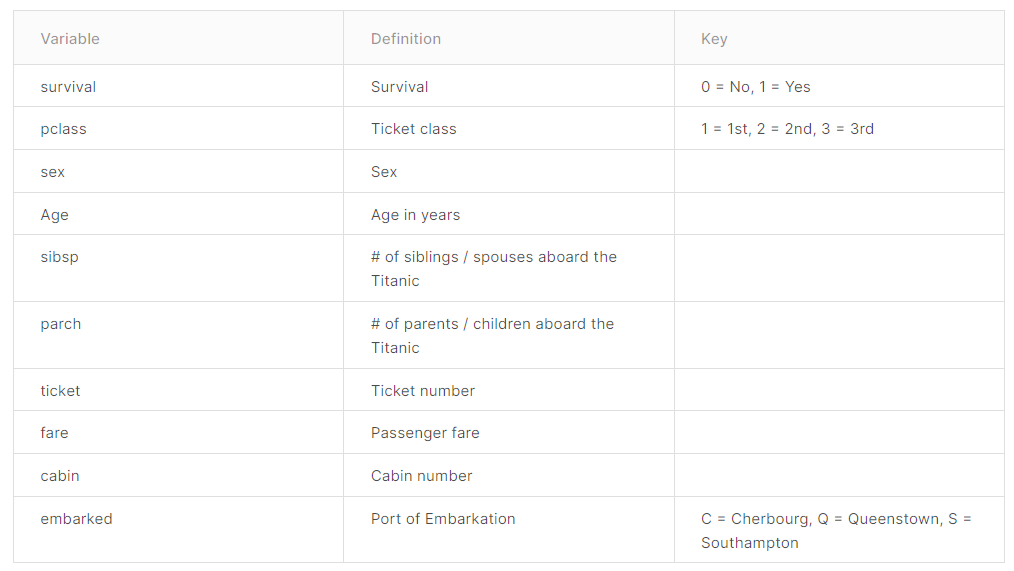

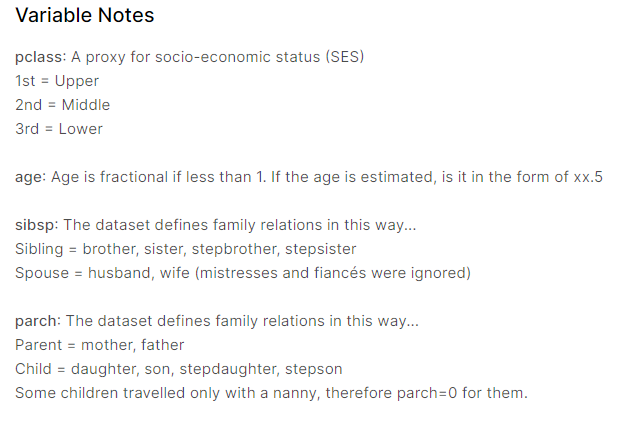

### Load the data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data.head()

# Test data does not contain the target variable (Survived)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Read data and split in training and test set

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('/kaggle/input/titanic/train.csv', index_col='PassengerId')
X_test_full = pd.read_csv('/kaggle/input/titanic/test.csv', index_col='PassengerId')

In [8]:
X_full

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['Survived'], inplace=True)
y = X_full.Survived
X_full.drop(['Survived'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [10]:
categorical_cols

['Sex', 'Embarked']

In [11]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
### Custom imputer for replacing missing values

In [13]:
import pandas as pd 
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class GroupImputer(BaseEstimator, TransformerMixin):
    '''
    Class used for imputing missing values in a pd.DataFrame using either mean or median of a group.
    
    Parameters
    ----------    
    group_cols : list
        List of columns used for calculating the aggregated value 
    target : str
        The name of the column to impute
    metric : str
        The metric to be used for remplacement, can be one of ['mean', 'median']
    Returns
    -------
    X : array-like
        The array with imputed values in the target column
    '''
    def __init__(self, group_cols, target, metric='mean'):
        
        assert metric in ['mean', 'median'], 'Unrecognized value for metric, should be mean/median'
        assert type(group_cols) == list, 'group_cols should be a list of columns'
        assert type(target) == str, 'target should be a string'
        
        self.group_cols = group_cols
        self.target = target
        self.metric = metric
    
    def fit(self, X, y=None):
        
        assert pd.isnull(X[self.group_cols]).any(axis=None) == False, 'There are missing values in group_cols'
        
        impute_map = X.groupby(self.group_cols)[self.target].agg(self.metric) \
                                                            .reset_index(drop=False)
        
        self.impute_map_ = impute_map
        
        return self 
    
    def transform(self, X, y=None):
        
        # make sure that the imputer was fitted
        check_is_fitted(self, 'impute_map_')
        
        X = X.copy()
        
        for index, row in self.impute_map_.iterrows():
            ind = (X[self.group_cols] == row[self.group_cols]).all(axis=1)
            X.loc[ind, self.target] = X.loc[ind, self.target].fillna(row[self.target])
        
        return X

In [14]:
# imp = GroupImputer(group_cols=["Sex", 'Pclass'], 
#                    target='Age', 
#                    metric='mean')

# df_imp = pd.DataFrame(imp.fit_transform(X_train), 
#                       columns=X_train.columns)

# print(f'df contains {sum(pd.isnull(X_train.Age))} missing values.')
# print(f'df_imp contains {sum(pd.isnull(df_imp.Age))} missing values.')

### Define Preprocessing steps

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import FeatureUnion
# Preprocessing for numerical data
custom_transformer = GroupImputer(group_cols=["Sex", 'Pclass'], 
                   target='Age', 
                   metric='mean')

numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

#Bundle preprocessing for numerical and categorical data
categorical_and_numerical_transformer = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ], remainder="passthrough")


# # Combining numerical and categorical pipeline into one full big pipeline horizontally
# # using FeatureUnion
# preprocessor = FeatureUnion(transformer_list=[
#     ('categorical_pipeline', categorical_transformer),
#     ('numerical_pipeline', numerical_transformer)])

### Define the model 

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

### Create and evaluate the pipeline

In [17]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('custom_transformer', custom_transformer),
                              ('categorical_and_numerical_transformer', categorical_and_numerical_transformer),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation dta, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 0.16759776536312848


In [18]:
X_test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [19]:
predictions = my_pipeline.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test.index, 'Survived': predictions})
output.to_csv('my_submission_pipeline.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [20]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [21]:
#There are many missing observations for the column "Cabin". It can be dropped
train_data.drop(["Cabin"], axis=1, inplace=True)

In [22]:
train_data[train_data.Age.isnull()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [23]:
train_data[train_data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [24]:
#train_data[train_data.Age <= 5].Name.to_list()

Mean age


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

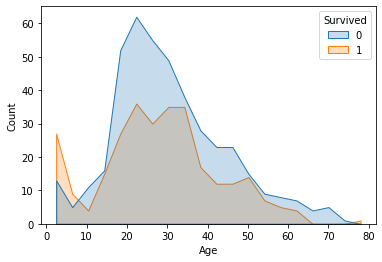

In [25]:
import seaborn as sns

sns.histplot(train_data, x="Age", hue="Survived", element="poly")

print("Mean age")
train_data.groupby('Survived').Age.mean()


Mean age


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

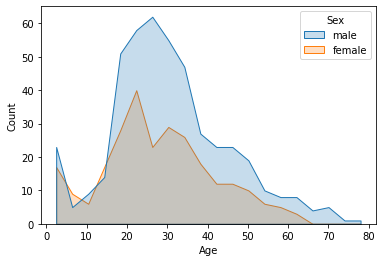

In [26]:
sns.histplot(train_data, x="Age", hue="Sex", element="poly")

print("Mean age")
train_data.groupby('Sex').Age.mean()


Mean age


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

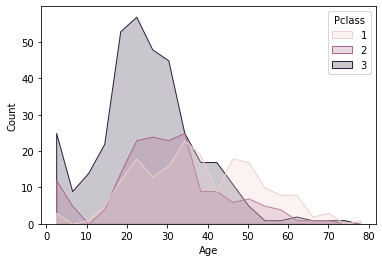

In [27]:
sns.histplot(train_data, x="Age", hue="Pclass", element="poly")

print("Mean age")
train_data.groupby('Pclass').Age.mean()


In [28]:
train_data["Family_size"] = train_data["Parch"] + train_data["SibSp"]

In [29]:
train_data.groupby(["Sex", 'Pclass']).Age.describe()

count       mean        std   min     25%   50%    75%   max
Sex    Pclass                                                              
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

Female and 3rd class people are on average younger. We can use these averages to fill the missing age values

In [30]:
train_data["Age"] =  train_data.groupby(["Sex", 'Pclass']).transform(lambda x: x.fillna(x.mean()))

In [31]:
train_data[train_data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size


In [32]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [33]:
train_data[train_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
61,62,1,1,"Icard, Miss. Amelie",female,62.0,0,0,113572,80.0,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,830.0,0,0,113572,80.0,NaN,0


In [34]:
train_data[(train_data["Fare"]<=85) &(train_data["Fare"]>75) ].Embarked.value_counts()

C    16
S    13
Name: Embarked, dtype: int64

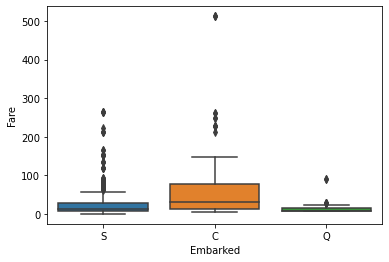

In [35]:
ax = sns.boxplot(x="Embarked", y="Fare", data=train_data)

In [36]:
train_data.groupby(["Embarked", 'Pclass']).Fare.describe()

count        mean        std      min      25%      50%  \
Embarked Pclass                                                            
C        1        85.0  104.718529  99.093935  26.5500  49.5000  78.2667   
         2        17.0   25.358335  11.345067  12.0000  13.8625  24.0000   
         3        66.0   11.214083   4.871528   4.0125   7.2292   7.8958   
Q        1         2.0   90.000000   0.000000  90.0000  90.0000  90.0000   
         2         3.0   12.350000   0.000000  12.3500  12.3500  12.3500   
         3        72.0   11.183393   6.721677   6.7500   7.7500   7.7500   
S        1       127.0   70.364862  58.811278   0.0000  29.2500  52.0000   
         2       164.0   20.327439  13.630741   0.0000  13.0000  13.5000   
         3       353.0   14.644083  13.276609   0.0000   7.8542   8.0500   

                        75%       max  
Embarked Pclass                        
C        1       110.883300  512.3292  
         2        37.004200   41.5792  
         3        14.458300   22.3583  
Q        1        90.000000   90.0000  
         2        12.350000   12.3500  
         3        10.218725   29.1250  
S        1        83.475000  263.0000  
         2        26.000000   73.5000  
         3        16.100000   69.5500

In [37]:
train_data.Embarked = train_data.Embarked.transform(lambda x: x.fillna("C"))

In [38]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [39]:
# Age is missing more frequently among people who did not survive. 

In [40]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,4.0,1,0,113803,53,S,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8,S,0


In [42]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = train_data.Survived
X = train_data.drop(['Survived'], axis=1)


# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

# Exploratory Analysis

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Sex", "Embarked", "Pclass"]

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

oh_enconder_train = OH_encoder.fit_transform(X_train[cat_cols])
oh_enconder_valid = OH_encoder.fit_transform(X_valid[cat_cols])
column_names = OH_encoder.get_feature_names(cat_cols)

OH_cols_train = pd.DataFrame(oh_enconder_train, columns=column_names)
OH_cols_valid = pd.DataFrame(oh_enconder_valid, columns=column_names)


# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(cat_cols, axis=1)
num_X_valid = X_valid.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [44]:
OH_X_train.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
140,141,"Boulos, Mrs. Joseph (Sultana)",141.0,0,2,2678,15,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
439,440,"Kvillner, Mr. Johan Henrik Johannesson",440.0,0,0,C.A. 18723,10,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
817,818,"Mallet, Mr. Albert",818.0,1,1,S.C./PARIS 2079,37,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
378,379,"Betros, Mr. Tannous",379.0,0,0,2648,4,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
491,492,"Windelov, Mr. Einar",492.0,0,0,SOTON/OQ 3101317,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


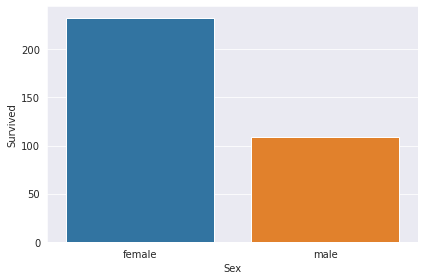

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

aggr_data = train_data[["Survived", "Sex"]].groupby(by=["Sex"], as_index=False).sum()

sns.set_style('darkgrid')
sns.barplot(x=aggr_data["Sex"], y=aggr_data["Survived"])

plt.tight_layout()
plt.show()

In [46]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of people who survived:", "%.2f" % (sum(train_data["Survived"])/len(train_data["Survived"])*100), "%")
print("% of women who survived:", "%.2f" % (rate_women*100), "%")
print("% of men who survived:", "%.2f" % (rate_men*100), "%")

% of people who survived: 38.38 %
% of women who survived: 74.20 %
% of men who survived: 18.89 %


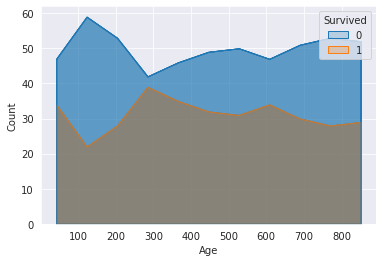

In [47]:
sns.histplot(train_data, x="Age", hue="Survived", element="poly")
sns.histplot(train_data, x="Age", hue="Survived", element="poly")
sns.histplot(train_data, x="Age", hue="Survived", element="poly")
sns.histplot(train_data, x="Age", hue="Survived", element="poly")


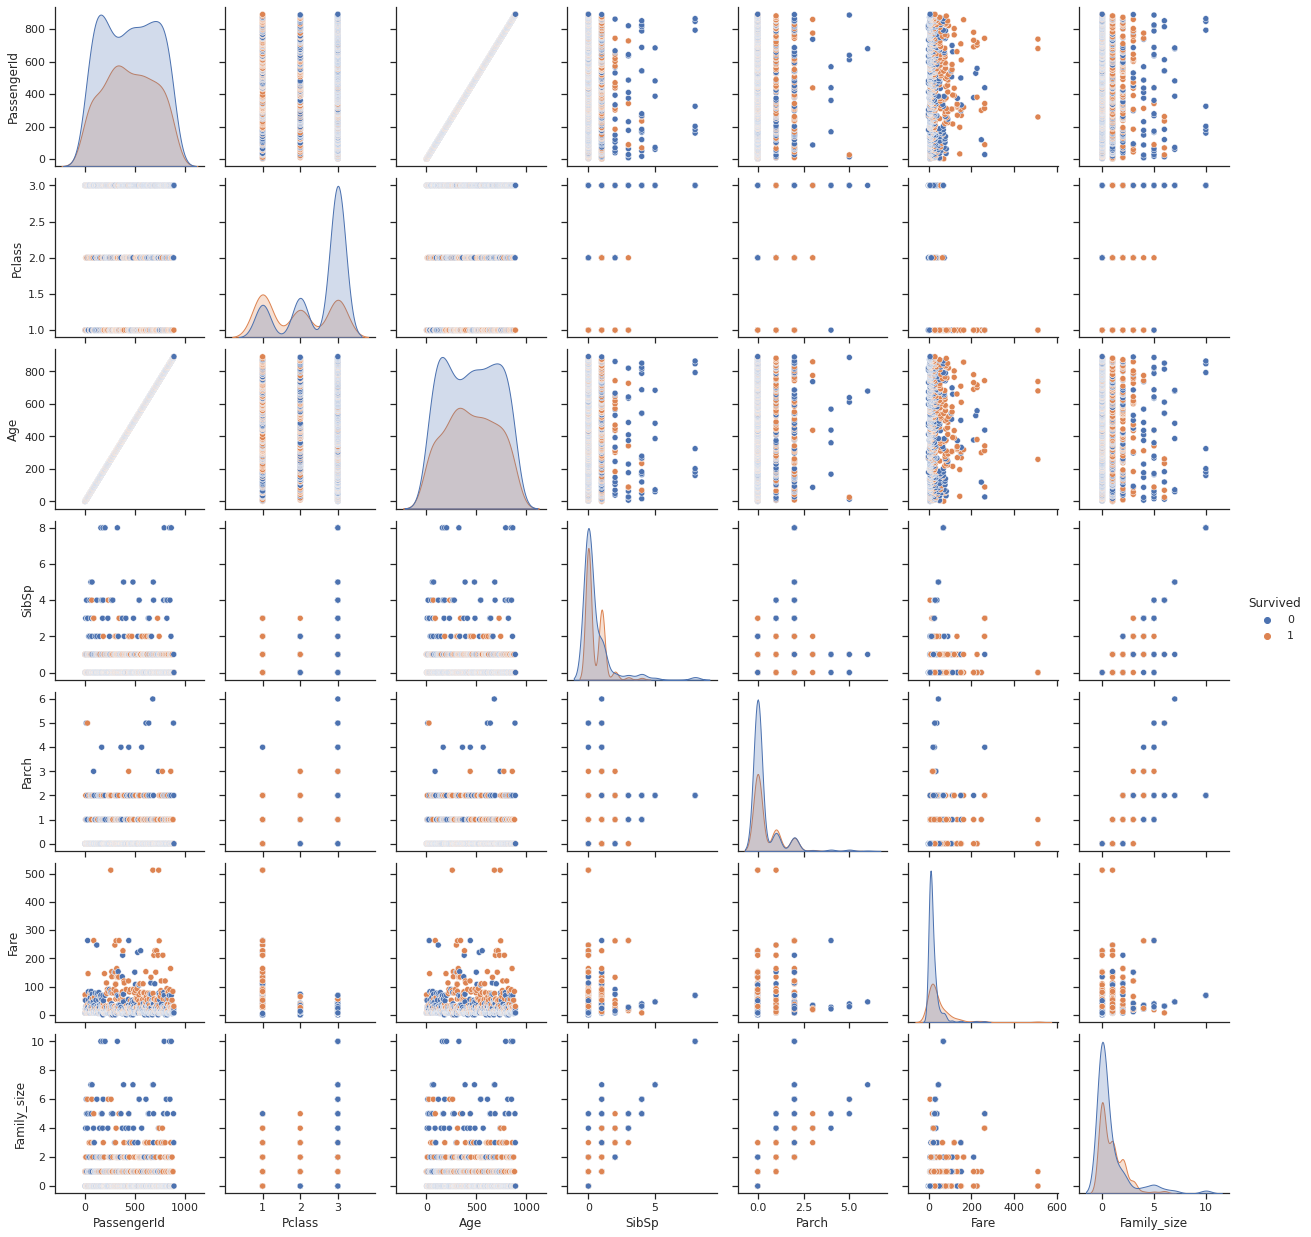

In [48]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(train_data, hue="Survived")

# Model the data

In [49]:
OH_X_train.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Family_size', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [50]:
from sklearn.ensemble import RandomForestClassifier

y = y_train

features = ['Sex_female', "Fare", 'Family_size', "Age"]

X = OH_X_train[features]
X_test =  OH_X_valid[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': X_valid.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
